In [27]:
import glob
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy import signal

import librosa
import librosa.display as DSP
import librosa as lr
from tempfile import mktemp
# import imagehash
from PIL import Image

import pylab

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import os
import wave
import time
import pickle
import warnings
import numpy as np
from sklearn import preprocessing
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import f1_score
import joblib


In [28]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=46)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [29]:
X_test = []
y_test = []
data = {}
lstFolders = ['Omar', 'Salman',  'Neveen', 'Nurhan']
for lst in lstFolders:
    X = []
    y = []
    listFiles = glob.glob(r"C:\Users\Lenovo\Desktop\Team Models\final team model isa - Copy\training_set\{}\*".format(lst))
    features = np.asarray(())
    finishCounter = len(listFiles)
    counter = 1
    for file in listFiles:
#         try:
            vector = features_extractor(file)
                
            X_test.append(vector)
            y_test.append(lstFolders.index(lst))

#         except:
#             continue

In [30]:
print(np.shape(X_test))
print(np.shape(y_test))

(20, 46)
(20,)


In [31]:
cols = ['{}'.format(i) for i in range(0, 46)]
df = pd.DataFrame(data = X_test, columns=cols)

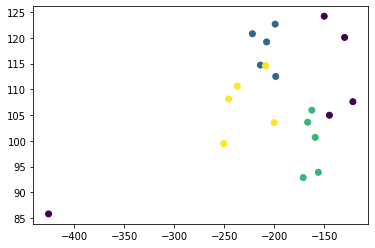

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_test)

In [33]:
df['y'] = y_test

In [34]:
df[df['y'] == 3].shape

(5, 47)

In [35]:
df.to_csv('model1.csv', index=False)

In [36]:
df.shape

(20, 47)

In [37]:
df = df[['0', '9', 'y']]

In [26]:
df.to_csv('model1.csv', index=False)

In [18]:
df['y'][0:20]

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    3
16    3
17    3
18    3
19    3
Name: y, dtype: int64

In [19]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=46)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

def getGraph3Data(file,df):
    newRow = list(features_extractor(file))
    newRow = [newRow[0], newRow[9], 2]
    # df = pd.read_csv(os.path.join(os.path.dirname(os.path.abspath(__file__)), 'model1.csv'))
    df.iloc[-1,:] = newRow
    print(df.shape)
    return df.iloc[:,0].values.tolist(), df.iloc[:,1].values.tolist()


def getGraph4Data(file):
    newRow = list(features_extractor(file))
    newRow = [newRow[15], newRow[26], 2]
    df = pd.read_csv(os.path.join(os.path.dirname(os.path.abspath(__file__)), 'model2.csv'))
    df.iloc[-1,:] = newRow
    print(df.shape)
    return df.iloc[:,0].values.tolist(), df.iloc[:,1].values.tolist()


In [22]:
file_path = "omar_open_door-sample2.wav"

In [23]:
x1, y1 = getGraph3Data(file_path,df)
# x2, y2 = getGraph4Data(file_path)
# x1

(20, 3)


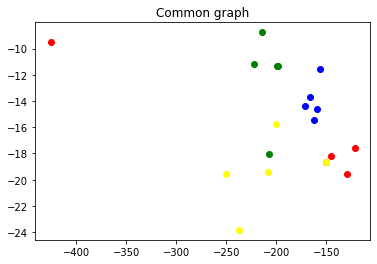

<Figure size 2880x2160 with 0 Axes>

In [25]:
plt.scatter(x1[0:5],y1[0:5],c ="red")
plt.scatter(x1[5:10],y1[5:10],c ="green")
plt.scatter(x1[10:15],y1[10:15],c ="blue")
plt.scatter(x1[15:20],y1[15:20],c ="yellow")

# plt.scatter(name_mfccs,mfcc_20_5,c="pink",marker ="^") #other

plt.title('Common graph')
plt.figure(figsize=(40,30))
plt.show()
# path = f'files/for_plot.jpg'
# plt.savefig(path)
# plt.close()


In [54]:
len(x1)

80

In [55]:
# plt(x1,y1)

In [56]:
gmm_files = [ i + '.joblib' for i in ['Open The Door', 'Close The Door',  'Open The Window', 'Close The Window', 'Open The Book', 'Others']]
models    = [joblib.load(fname) for fname in gmm_files]

FileNotFoundError: [Errno 2] No such file or directory: 'Open The Door.joblib'

In [ ]:
final_y = []
for i in X_test:
    log_likelihood = np.zeros(len(models)) 
    for j in range(len(models)):
        gmm = models[j] 
        scores = np.array(gmm.score(i))
        log_likelihood[j] = scores.sum()
    y.append(log_likelihood)

    winner = np.argmax(log_likelihood)
    final_y.append(winner)

In [ ]:
f1_score(final_y, y_test, average='micro')

In [ ]:
# y

In [ ]:
file = r'C:\Users\kamel\OneDrive\Documents\DSP_Task03\uploads\blob.wav'
audio, sr = librosa.load(file)
vector = extract_features(audio, sr)
og_likelihood = np.zeros(len(models)) 
for i in range(len(models)):
    gmm    = models[i] 
    scores = np.array(gmm.score(vector))
    log_likelihood[i] = scores.sum()
y.append(log_likelihood)

winner = np.argmax(log_likelihood)

In [ ]:
log_likelihood

In [ ]:
winner

In [ ]:
df = pd.DataFrame({
    '_':final_y,
    '__':y_test
})

In [ ]:
df[df['_'] != df['__']][:]